In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
bgmdata = pd.read_csv('bgmdata_cleaned.csv')

cuedAR_list = np.sort(bgmdata.cuedAR.unique())
print(cuedAR_list)

[-0.46 -0.42 -0.37 -0.32 -0.28 -0.23 -0.19 -0.14 -0.09 -0.05  0.    0.05
  0.09  0.14  0.19  0.23  0.28  0.32  0.37  0.42  0.46]


/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/243825389.py:33: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.18753528060156802 +- 0.027071399804205504
X_mean = -0.3807934214083242 +- 0.1070251775174277
sigma =  0.322309877192635 +- 0.10212389627853614


1
Fit parameters: 
C =  0.1889080963566802 +- 0.028604241735642816
X_mean = -0.32206769499813187 +- 0.06711599970983553
sigma =  0.28030807073694347 +- 0.07308495985900908


2
Fit parameters: 
C =  0.19008641989370853 +- 0.03015905783858005
X_mean = -0.2815948143660532 +- 0.0592262051132559
sigma =  0.2717720044858013 +- 0.06643812076609033


3
Fit parameters: 
C =  0.18811518451131284 +- 0.03169763779233444
X_mean = -0.2639984876244741 +- 0.05927746548114942
sigma =  0.26804971452969606 +- 0.06670435841494982


4
Fit parameters: 
C =  0.1747909157513747 +- 0.024970569763253705
X_mean = -0.20967907721002801 +- 0.05479073758697019
sigma =  0.29925850911471613 +- 0.06181907045594496


5
Fit parameters: 
C =  0.17585051258150297 +- 0.024857604592045227
X_mean = -0.18580337001447836 +- 0.050595255102431624
sigma =  0.2910

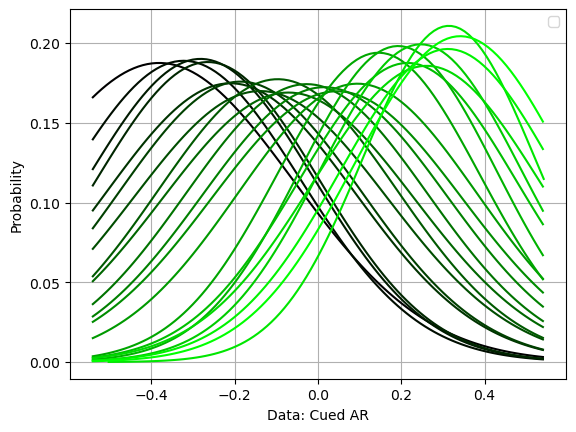

[-4.60000000e-01 -4.14000000e-01 -3.68000000e-01 -3.22000000e-01
 -2.76000000e-01 -2.30000000e-01 -1.84000000e-01 -1.38000000e-01
 -9.20000000e-02 -4.60000000e-02 -5.55111512e-17  4.60000000e-02
  9.20000000e-02  1.38000000e-01  1.84000000e-01  2.30000000e-01
  2.76000000e-01  3.22000000e-01  3.68000000e-01  4.14000000e-01
  4.60000000e-01]


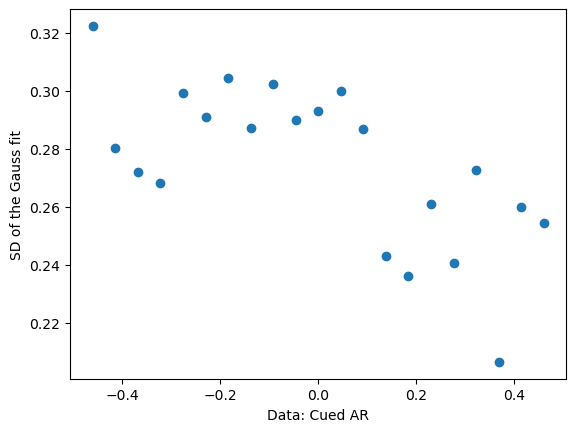

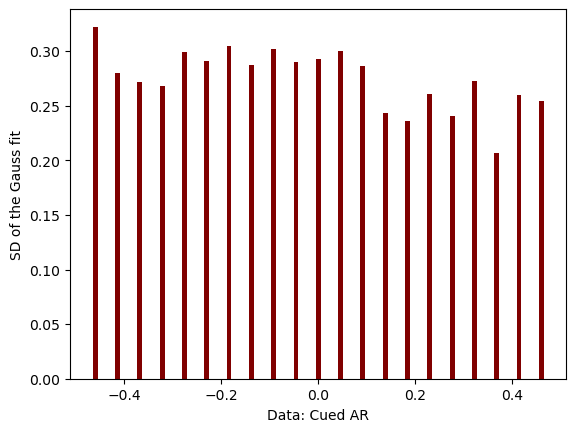

In [26]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []

for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata.loc[bgmdata['cuedAR'] == cuedAR_list[i]]["responseAR"] #0.46, 0.28, 0.14
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)
# colors = cm.rainbow(np.linspace(0, 1, len(gauss_fits_list)))
import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i / 20.0, 0, 1),label='') #Gaussian fit #r.:

#setting the label,title and grid of the plot
plt.legend()
plt.xlabel("Data: Cued AR")
plt.ylabel("Probability")
plt.grid("on")
plt.show()

#plt.plot(gauss_SD_list)

x_range = np.linspace(min(cuedAR_list), max(cuedAR_list), len(cuedAR_list))
print(x_range)
plt.scatter(x_range, gauss_SD_list)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()
plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



In [ ]:
bgmdata[(bgmdata.uncuedCat==1) & (bgmdata.sameDirection1S0D==1)]

/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/3471492184.py:48: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.19010591663436205 +- 0.029471203606886577
X_mean = -0.3380431246860861 +- 0.07689353875014857
sigma =  0.2882053396403085 +- 0.08162574869148671


1
Fit parameters: 
C =  0.20133339595969948 +- 0.027705838647867204
X_mean = -0.3201188623128848 +- 0.04638330115094042
sigma =  0.24264217102281277 +- 0.0520358482885776


2
Fit parameters: 
C =  0.1914728509148977 +- 0.02836416586197822
X_mean = -0.28510660944776045 +- 0.049152693237239
sigma =  0.25222594658974573 +- 0.05531982155690011


3
Fit parameters: 
C =  0.20509796435456285 +- 0.037031617459788314
X_mean = -0.28067651451083897 +- 0.04661508026776491
sigma =  0.21388488247184165 +- 0.05167154778725526


4
Fit parameters: 
C =  0.16561237485101205 +- 0.024325046707399017
X_mean = -0.21684200626204642 +- 0.0655899544784898
sigma =  0.3265396822922987 +- 0.07435389044179055


5
Fit parameters: 
C =  0.18225538811091196 +- 0.029619741987562932
X_mean = -0.18775501244928572 +- 0.05341103671048251
sigma =  0.272

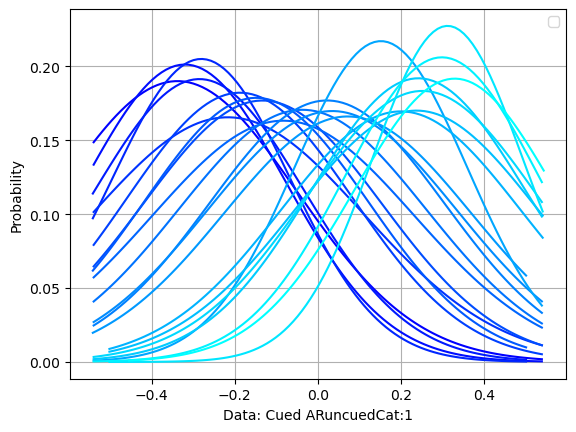

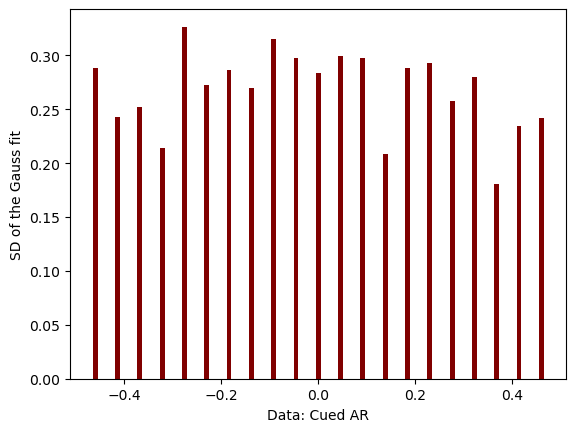

In [27]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories '''

# new data where uncued cat is tall
UC_cat = 1 # 1 is tall, -1 is flat
bgmdata_UC_tall = bgmdata[bgmdata.uncuedCat==UC_cat]

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_tall[bgmdata_UC_tall['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()


/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/3642169342.py:49: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.19273855650407845 +- 0.027151019931791018
X_mean = -0.413492709273349 +- 0.11182853152380381
sigma =  0.3092139424872587 +- 0.10183125520980789


1
Fit parameters: 
C =  0.1796719249012482 +- 0.029045993555951683
X_mean = -0.32406368050021056 +- 0.09131285128609609
sigma =  0.31595839640590134 +- 0.09576959051226364


2
Fit parameters: 
C =  0.19149738435486152 +- 0.032625190890457234
X_mean = -0.29354062353588606 +- 0.06502087952003532
sigma =  0.2707345245112363 +- 0.07267633015127441


3
Fit parameters: 
C =  0.1887293621391814 +- 0.03082016430379235
X_mean = -0.27298492711042877 +- 0.05970228109485921
sigma =  0.2714508564726478 +- 0.06710185442958054


4
Fit parameters: 
C =  0.18238092134352932 +- 0.025652025990078153
X_mean = -0.2025908712781842 +- 0.04850730118211839
sigma =  0.28002041472515 +- 0.05420960516989233


5
Fit parameters: 
C =  0.17347744010192526 +- 0.028729822703110888
X_mean = -0.21366831951652604 +- 0.05247945419688984
sigma =  0.26129

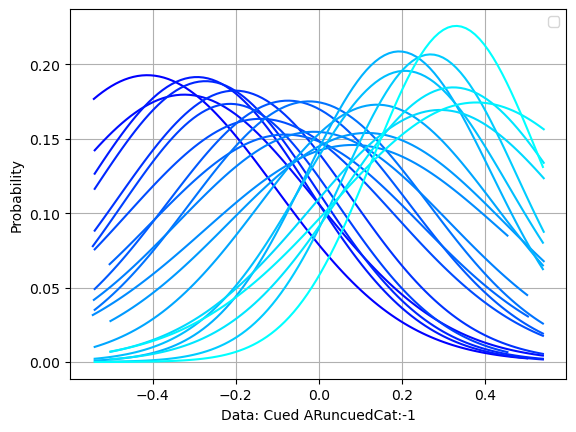

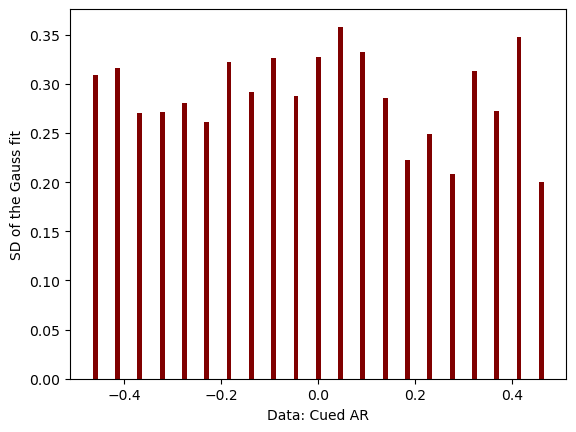

In [28]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories '''

# new data where uncued cat is tall
UC_cat = -1 # 1 is tall, -1 is flat

bgmdata_UC_tall = bgmdata[bgmdata.uncuedCat==UC_cat]

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_tall[bgmdata_UC_tall['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/4220779527.py:51: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.19245085008360938 +- 0.05298215573457857
X_mean = -0.6246180335681167 +- 0.3817267244722287
sigma =  0.47750094724866265 +- 0.22477583927008846


1
Fit parameters: 
C =  0.179794923061624 +- 0.03161005760867219
X_mean = -0.30063869400059495 +- 0.08871380050984469
sigma =  0.3108854925064998 +- 0.0959456190717217


2
Fit parameters: 
C =  0.21509036792085168 +- 0.03769474683263601
X_mean = -0.3272985422312396 +- 0.048862718599223295
sigma =  0.21455278523020452 +- 0.05512617561296696


3
Fit parameters: 
C =  0.1944398285159555 +- 0.035101690493307455
X_mean = -0.2690878272710184 +- 0.06099116628084995
sigma =  0.2598998872077813 +- 0.06864104095597261


4
Fit parameters: 
C =  0.16300817786536428 +- 0.02639512115155406
X_mean = -0.2288509064165474 +- 0.05749091017192381
sigma =  0.28005631296642564 +- 0.06535957711310679


5
Fit parameters: 
C =  0.1471771518459067 +- 0.02185715952362396
X_mean = -0.21080001823660496 +- 0.062142202761961
sigma =  0.30478118749

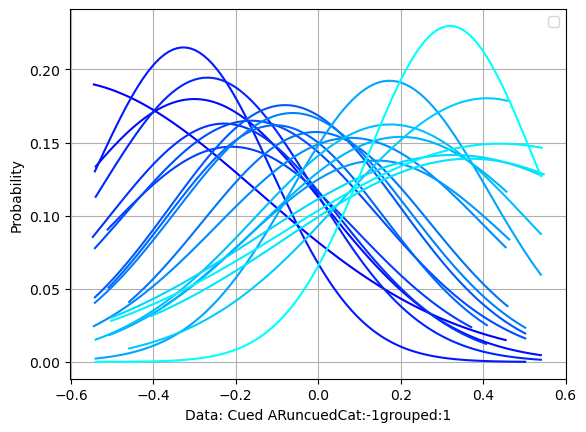

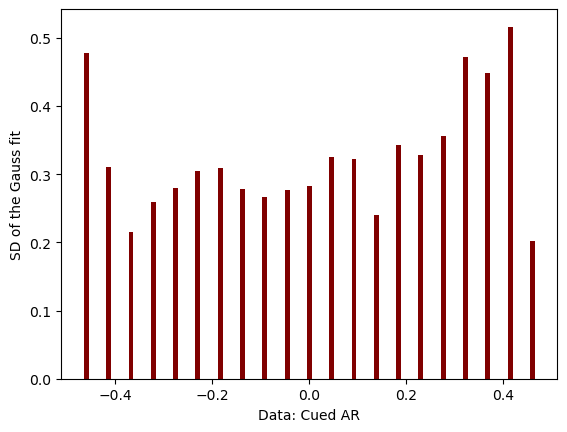

In [32]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories AND motion sharedness'''

# new data where uncued cat is tall
UC_cat = -1 # 1 is tall, -1 is flat
grouped = 1

bgmdata_UC_flat_grouped = bgmdata[(bgmdata.uncuedCat==UC_cat) & (bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_flat_grouped[bgmdata_UC_flat_grouped['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat) + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/1897964751.py:51: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.21101072399547754 +- 0.03267613337516448
X_mean = -0.3697258109194559 +- 0.05444400264380285
sigma =  0.22680652847616017 +- 0.05978313409920402


1
Fit parameters: 
C =  0.20382999635347912 +- 0.03607818554418308
X_mean = -0.31023348469564505 +- 0.04289360473047514
sigma =  0.19906678224987082 +- 0.04777402003594378


2
Fit parameters: 
C =  0.18577554045235262 +- 0.03177084153840611
X_mean = -0.2852038199407834 +- 0.06972087881159429
sigma =  0.2842494916793939 +- 0.07768290447962839


3
Fit parameters: 
C =  0.1923959487490241 +- 0.03145214603067884
X_mean = -0.2907726371362813 +- 0.05243271612444915
sigma =  0.24530530108563026 +- 0.0590301669969546


4
Fit parameters: 
C =  0.18675892412391334 +- 0.02480844847173731
X_mean = -0.19479801694711352 +- 0.0429671087015699
sigma =  0.2684729712628146 +- 0.047525769679350946


5
Fit parameters: 
C =  0.17252434074543227 +- 0.02967435000593753
X_mean = -0.21845163550933372 +- 0.055247768688355674
sigma =  0.26307

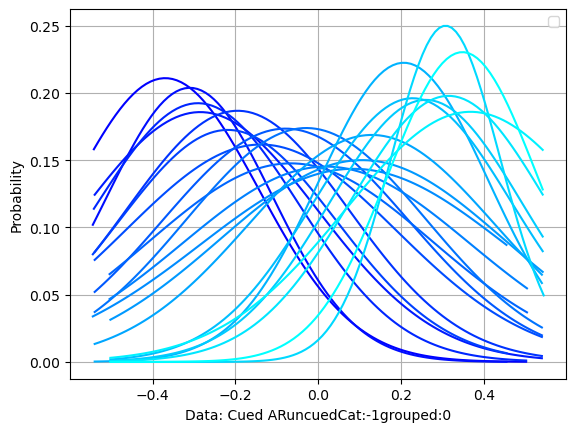

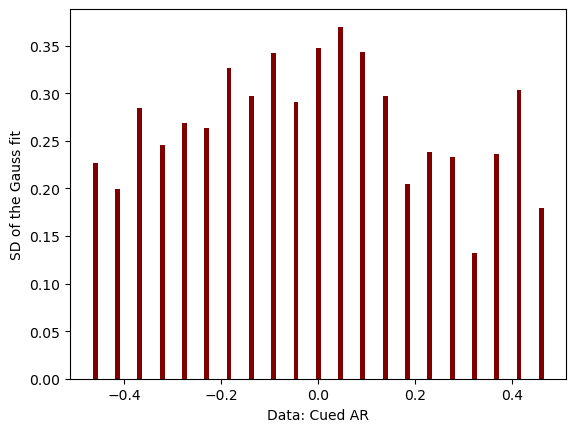

In [33]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories AND motion sharedness'''

# new data where uncued cat is tall
UC_cat = -1 # 1 is tall, -1 is flat
grouped = 0

bgmdata_UC_flat_ungrouped = bgmdata[(bgmdata.uncuedCat==UC_cat) & (bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_flat_ungrouped[bgmdata_UC_flat_ungrouped['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat) + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/2017490359.py:51: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.3103376020049974 +- 0.06993209430045834
X_mean = -0.3903359003128757 +- 0.025594854193135484
sigma =  0.09970694130873388 +- 0.026699704152910432


1
Fit parameters: 
C =  0.24018773515091665 +- 0.05108759108835619
X_mean = -0.32927359195366124 +- 0.03749237739246259
sigma =  0.15176607236022388 +- 0.03988855199723968


2
Fit parameters: 
C =  0.1984523664978363 +- 0.04294825073547817
X_mean = -0.2825239651862641 +- 0.0589291200662291
sigma =  0.22192473577289598 +- 0.06573625609392526


3
Fit parameters: 
C =  0.2463778472953416 +- 0.05073602737822089
X_mean = -0.28522594557937525 +- 0.03652264947395627
sigma =  0.1537112210134637 +- 0.03765776473482267


4
Fit parameters: 
C =  0.15687990994352416 +- 0.02734330535537359
X_mean = -0.2363580884906018 +- 0.09565140413393938
sigma =  0.3383896225977322 +- 0.10545908045840244


5
Fit parameters: 
C =  0.15431448080323557 +- 0.025052069095429768
X_mean = -0.20225417405616325 +- 0.10449733921455924
sigma =  0.35810

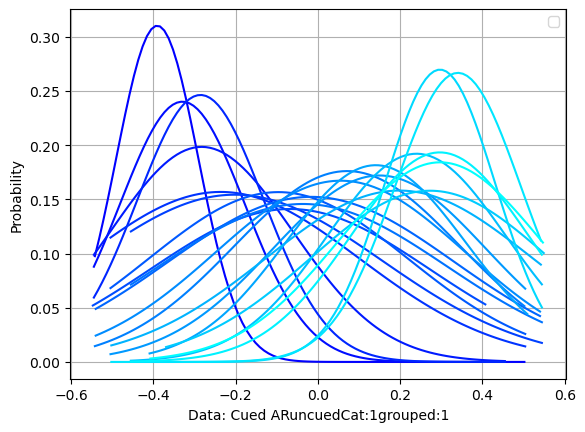

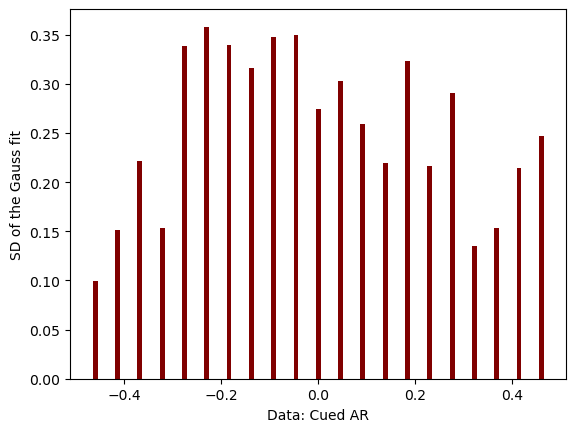

In [34]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories AND motion sharedness'''

# new data where uncued cat is tall
UC_cat = 1 # 1 is tall, -1 is flat
grouped = 1

bgmdata_UC_tall_grouped = bgmdata[(bgmdata.uncuedCat==UC_cat) & (bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_tall_grouped[bgmdata_UC_tall_grouped['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat) + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/562493877.py:51: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.19436190606911682 +- 0.026581475306180546
X_mean = -0.32317835746032114 +- 0.05639991151733223
sigma =  0.26942968511759297 +- 0.06196908755648888


1
Fit parameters: 
C =  0.1878587843490178 +- 0.02502369150092071
X_mean = -0.32122630448618855 +- 0.0606686289252363
sigma =  0.28469318411233807 +- 0.0658428018429687


2
Fit parameters: 
C =  0.1944044782734936 +- 0.02812255159406956
X_mean = -0.27881955756550103 +- 0.044458053784626396
sigma =  0.24199911429949075 +- 0.04996865434205968


3
Fit parameters: 
C =  0.19670693859305613 +- 0.03769270038234642
X_mean = -0.2794305034138919 +- 0.05388800439345435
sigma =  0.22777235828759504 +- 0.06025848826763706


4
Fit parameters: 
C =  0.16652095933906763 +- 0.024325370798633873
X_mean = -0.21595408067001315 +- 0.064458289937308
sigma =  0.32454306470463795 +- 0.07307252864136617


5
Fit parameters: 
C =  0.1935063606151175 +- 0.030177396745181564
X_mean = -0.2071250484036941 +- 0.04642990553668231
sigma =  0.2499

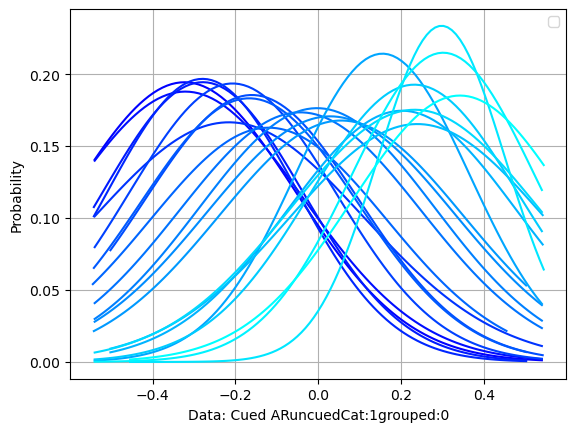

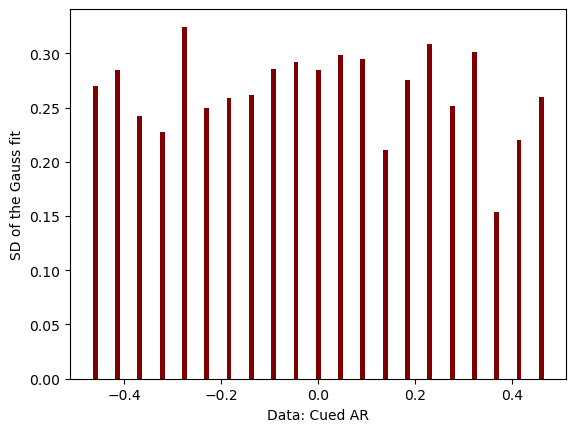

In [39]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' doing it for categories AND motion sharedness'''

# new data where uncued cat is tall
UC_cat = 1 # 1 is tall, -1 is flat
grouped = 0

bgmdata_UC_tall_ungrouped = bgmdata[(bgmdata.uncuedCat==UC_cat) & (bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_tall_ungrouped[bgmdata_UC_tall_ungrouped['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "uncuedCat:" + str(UC_cat) + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/3670160142.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
Fit parameters: 
C =  0.31002271969433154 +- 0.020545852499972303
X_mean = -0.026527303894428787 +- 0.011669369055460444
sigma =  0.15251500615685729 +- 0.011672543017725589


1
Fit parameters: 
C =  0.3235846575612439 +- 0.022307049145029994
X_mean = -0.04244423317351874 +- 0.01308517637508536
sigma =  0.16440053948712405 +- 0.013088033445570291


2
Fit parameters: 
C =  0.33848322274338216 +- 0.026545334289499796
X_mean = -0.0266497653146971 +- 0.012954278403621147
sigma =  0.14335881648204937 +- 0.01301244018551926


3
Fit parameters: 
C =  0.2691840981430639 +- 0.019950768687888736
X_mean = -0.0430340312029652 +- 0.01604796376796065
sigma =  0.1875342688051526 +- 0.016053745299093508


4
Fit parameters: 
C =  0.26669129131503777 +- 0.014034659570154217
X_mean = -0.03195505313273858 +- 0.010204718757490133
sigma =  0.16797296608528994 +- 0.010219417326531078


5
Fit parameters: 
C =  0.2629494521071466 +- 0.02068793189369126
X_mean = -0.02737086760427415 +- 0.017015232532434168
si

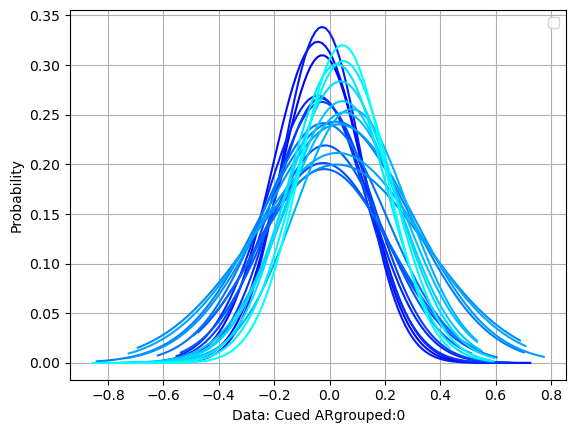

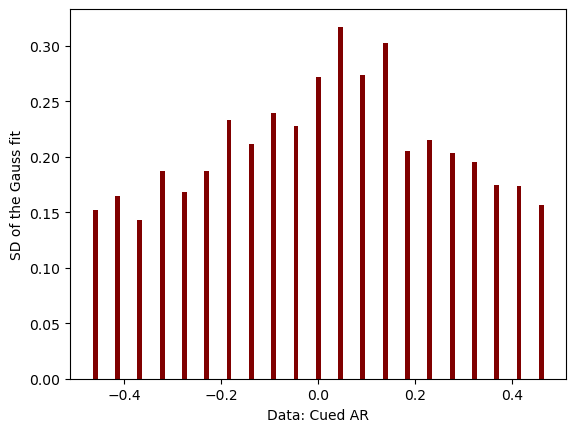

In [43]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' JUST THE SAME MOTION VS DIFF MOTION ON OVERALL RESPONSE ON CUED AR '''

# new data where uncued cat is tall
#UC_cat = -1 # 1 is tall, -1 is flat
UC_cat = -1 # 1 is tall, -1 is flat
grouped = 0

tmpdata = bgmdata[(bgmdata.uncuedCat==UC_cat) & (bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = tmpdata[tmpdata['cuedAR'] == cuedAR_list[i]]["responseAR_normed"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



In [ ]:
from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' overall on normed response based on grouping and category '''

# new data where uncued cat is tall
#UC_cat = -1 # 1 is tall, -1 is flat
grouped = 1

bgmdata_UC_grouped = bgmdata[(bgmdata.sameDirection1S0D==grouped)]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


for i in range(len(cuedAR_list)):
    print(i)
    x = bgmdata_UC_grouped[bgmdata_UC_grouped['cuedAR'] == cuedAR_list[i]]["responseAR"] #THIS IS FOR FLAT
    m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
    data = m(x)
    data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
    data -= data.min()

    #plotting the histogram
    hist, bin_edges = np.histogram(x)
    hist=hist/sum(hist)

    n = len(hist)
    x_hist=np.zeros((n),dtype=float) 
    for ii in range(n):
        x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

    y_hist=hist

    #Calculating the Gaussian PDF values given Gaussian parameters and random variable X
    def gaus(X,C,X_mean,sigma):
        return C*exp(-(X-X_mean)**2/(2*sigma**2))

    mean = sum(x_hist*y_hist)/sum(y_hist)                  
    sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

    #Gaussian least-square fitting process
    param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

    #print fit Gaussian parameters
    print("Fit parameters: ")
    print("=====================================================")
    print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
    print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
    print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
    print("\n")

    gauss_SD_list.append(param_optimised[2])

    #STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
    #fig = plt.figure()
    x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
    #plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

    gauss_fits_list.append([x_hist_2,param_optimised])
    #Normalise the histogram values
    #weights = np.ones_like(x) / len(x)
    #plt.hist(x, weights=weights)

for i in range(len(gauss_fits_list)):
    plt.plot(gauss_fits_list[i][0],gaus(gauss_fits_list[i][0],*gauss_fits_list[i][1]),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")
plt.show()

plt.bar(x_range, gauss_SD_list, color ='maroon',
        width = 0.01)
plt.xlabel("Data: Cued AR")
plt.ylabel("SD of the Gauss fit")
plt.show()



/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_93331/3061928394.py:52: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return C*exp(-(X-X_mean)**2/(2*sigma**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Fit parameters: 
C =  0.314894837316352 +- 0.009293444077047564
X_mean = 0.0038481235562728587 +- 0.007478807028788163
sigma =  0.2194600247179466 +- 0.0074790282188256915




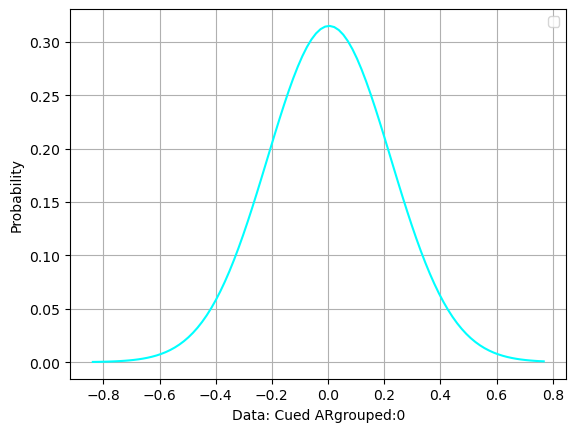

In [56]:
''' doing it on all responses '''


from scipy import optimize
import matplotlib.pyplot as plt
from astropy import modeling
from matplotlib import cm
# Define the colors to be used using rainbow map (or any other sequential map)

import itertools
#colors = itertools.cycle(["r", "b", "g"]) # next(colors)
import matplotlib as mpl

''' overall on normed response based on grouping and category '''

# new data where uncued cat is tall
UC_cat = -1 # 1 is tall, -1 is flat
grouped = 0

tmpdata = bgmdata[(bgmdata.sameDirection1S0D==grouped) & (bgmdata.uncuedCat==UC_cat) ]


def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

# list that will store plot values
gauss_fits_list = []
gauss_SD_list = []
category_list = [-1, 1] #skipping circle (0)
gauss_fits_list_mega = []# mega list


x = tmpdata["responseAR_normed"] #THIS IS FOR FLAT
m = modeling.models.Gaussian1D(amplitude=10, mean=30, stddev=5)
data = m(x)
data = data + np.sqrt(data) * np.random.random(x.size) - 0.5
data -= data.min()

#plotting the histogram
hist, bin_edges = np.histogram(x)
hist=hist/sum(hist)

n = len(hist)
x_hist=np.zeros((n),dtype=float) 
for ii in range(n):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2

y_hist=hist

#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = sum(y_hist*(x_hist-mean)**2)/sum(y_hist) 

#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)

#print fit Gaussian parameters
print("Fit parameters: ")
print("=====================================================")
print("C = ", param_optimised[0], "+-",np.sqrt(param_covariance_matrix[0,0]))
print("X_mean =", param_optimised[1], "+-",np.sqrt(param_covariance_matrix[1,1]))
print("sigma = ", param_optimised[2], "+-",np.sqrt(param_covariance_matrix[2,2]))
print("\n")


#STEP 4: PLOTTING THE GAUSSIAN CURVE -----------------------------------------
#fig = plt.figure()
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),100)
#plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'r',label='') #Gaussian fit #r.:

plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),color = (0, i/20.0, 1),label='') #Gaussian fit #r.:
plt.legend()
plt.xlabel("Data: Cued AR" + "grouped:" + str(grouped))
plt.ylabel("Probability")
plt.grid("on")


